In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

In [2]:
PATH = "../data/pikabu_clear.csv"

In [3]:
warnings.filterwarnings('ignore')

In [4]:
def str_to_date(l):
    if len(l) == 2:
        return None
    return datetime.datetime.strptime(l[2:-2], '%Y-%m-%dT%H:%M:%S%z')

In [5]:
df = pd.read_csv(PATH, delimiter="\t", header=0, names=["date", "title", "text", "author", "tags", "rating", "comments", "views"])
df.head()

,date,title,text,author,tags,rating,comments,views
0,['2016-03-19T23:32:28+03:00'],Чечня (продолжение историй из жизни срочной сл...,предыдущие нас служило достаточно много дагест...,koxamneneploxa,"['[моё]', 'Чечня', 'Срочники', 'Мат', 'Текст']",45.0,11,None
1,[],"У вас свой бизнес, но пришла пандемия? Рассказ...",кажется в последнее время мы стали видеться с ...,specials,None,NaN,None,None
2,['2016-03-19T23:08:22+03:00'],"Будни камнеобработки, vol. 11",всем привет у меня появилась возможность радов...,StoneOrange,"['[моё]', 'Строительство', 'Камень', 'Гранит',...",43.0,13,None
3,['2016-03-19T22:21:35+03:00'],Мотоциклы Второй Мировой войны.,германияbmw r75 с коляскойпроизводитель bayeri...,Kyzmii4,"['Мотоциклы', 'Вторая', 'мировая', 'война', 'Д...",26.0,8,None
4,[],"У вас свой бизнес, но пришла пандемия? Рассказ...",кажется в последнее время мы стали видеться с ...,specials,None,NaN,None,None


In [6]:
meta_df = df[["rating", "comments"]]
meta_df["comments"] = df["comments"].apply(lambda x: int(x) if x != "None" else np.nan)
meta_df["date"] = df["date"].apply(lambda x: str_to_date(x))
meta_df["hour"] = meta_df["date"].apply(lambda x: x.hour)
meta_df["len"] = df["text"].apply(lambda x: len(x))
meta_df["word_count"] = df["text"].apply(lambda x: len(x.split()))
meta_df.head()

,rating,comments,date,hour,len,word_count
0,45.0,11.0,2016-03-19 23:32:28+03:00,23.0,4126,674
1,NaN,NaN,NaT,NaN,10784,1480
2,43.0,13.0,2016-03-19 23:08:22+03:00,23.0,7125,1056
3,26.0,8.0,2016-03-19 22:21:35+03:00,22.0,12238,1533
4,NaN,NaN,NaT,NaN,10784,1480


### Statistics

In [7]:
meta_df.describe()

,rating,comments,hour,len,word_count
count,24632.000000,24632.000000,24632.000000,36612.000000,36612.000000
mean,562.079855,83.557689,21.128491,7115.790806,1034.179285
std,1247.249992,148.921709,1.347507,4256.643540,606.341331
min,22.000000,0.000000,15.000000,2000.000000,1.000000
25%,58.000000,17.000000,20.000000,3193.750000,493.000000
50%,152.000000,38.000000,21.000000,6150.000000,937.000000
75%,488.000000,88.000000,22.000000,10784.000000,1480.000000
max,27297.000000,5000.000000,23.000000,29053.000000,4851.000000


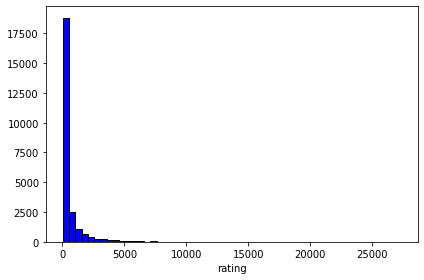

In [8]:
binwidth = 500

# Draw the plot
plt.hist(meta_df["rating"], bins = int((meta_df["rating"].max() - meta_df["rating"].min())/binwidth),
         color = 'blue', edgecolor = 'black')

# Title and labels
plt.xlabel("rating")

plt.tight_layout()
plt.show()


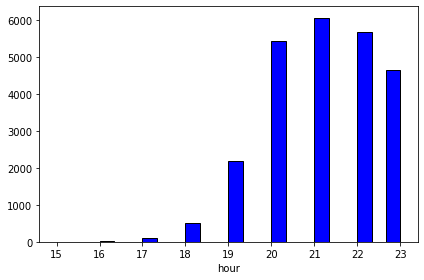

In [9]:
# Draw the plot
plt.hist(meta_df["hour"], bins = 24,
         color = 'blue', edgecolor = 'black')

# Title and labels
plt.xlabel("hour")

plt.tight_layout()
plt.show()

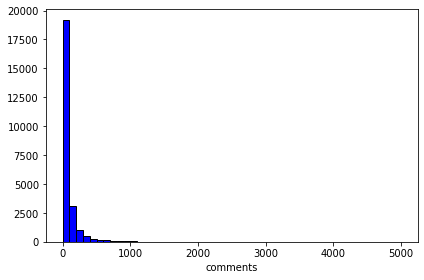

In [10]:
binwidth = 100
# Draw the plot
plt.hist(meta_df["comments"], bins = int((meta_df["comments"].max() - meta_df["comments"].min())/binwidth),
         color = 'blue', edgecolor = 'black')

# Title and labels
plt.xlabel("comments")

plt.tight_layout()
plt.show()

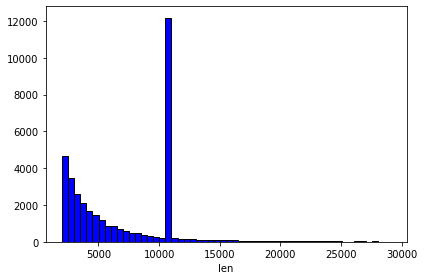

In [11]:
binwidth = 500
# Draw the plot
plt.hist(meta_df["len"], bins = int((meta_df["len"].max() - meta_df["len"].min())/binwidth),
         color = 'blue', edgecolor = 'black')

# Title and labels
plt.xlabel("len")

plt.tight_layout()
plt.show()

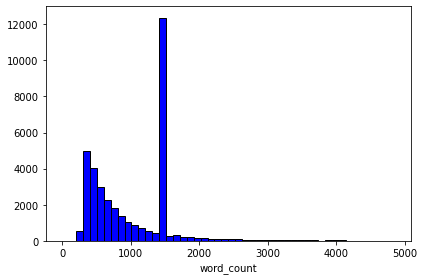

In [12]:
binwidth = 100
# Draw the plot
plt.hist(meta_df["word_count"], bins = int((meta_df["word_count"].max() - meta_df["word_count"].min())/binwidth),
         color = 'blue', edgecolor = 'black')

# Title and labels
plt.xlabel("word_count")

plt.tight_layout()
plt.show()

### Correlation

In [13]:
meta_df.corr()

,rating,comments,hour,len,word_count
rating,1.000000,0.771680,-0.004797,-0.094286,-0.089378
comments,0.771680,1.000000,0.001872,-0.064880,-0.061412
hour,-0.004797,0.001872,1.000000,0.000673,0.003562
len,-0.094286,-0.064880,0.000673,1.000000,0.989558
word_count,-0.089378,-0.061412,0.003562,0.989558,1.000000


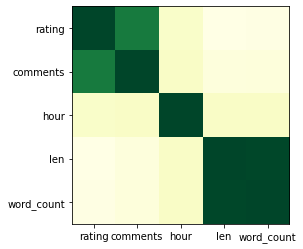

In [14]:
data = meta_df.corr()
labels = ["rating", "comments", "hour", "len", "word_count"]
ax = plt.gca()
ax.imshow(data, cmap='YlGn', interpolation='nearest')
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

### Scatter plots

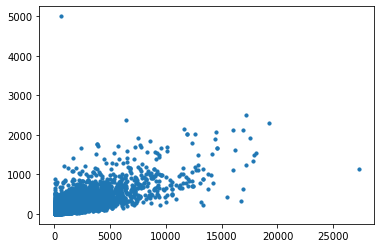

In [15]:
plt.scatter(meta_df["rating"], meta_df["comments"], s=10)
plt.show()

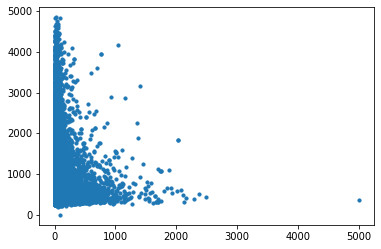

In [16]:
plt.scatter(meta_df["comments"], meta_df["word_count"], s=10)
plt.show()

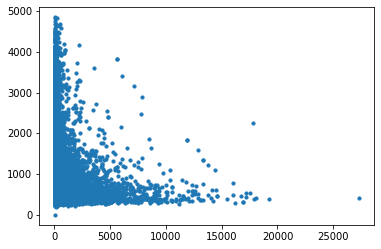

In [17]:
plt.scatter(meta_df["rating"], meta_df["word_count"], s=10)
plt.show()

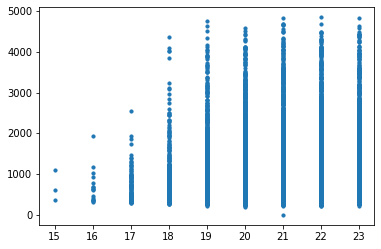

In [18]:
plt.scatter(meta_df["hour"], meta_df["word_count"], s=10)
plt.show()

### PCA

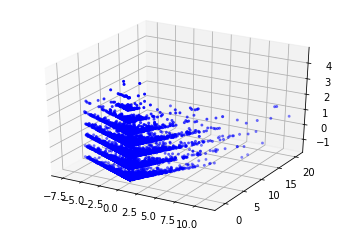

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
scaler = StandardScaler()

anomaly_df = meta_df[["rating", "comments", "hour", "len", "word_count"]]

X = scaler.fit_transform(anomaly_df.dropna())
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="b")

plt.show()

### Anomaly detection

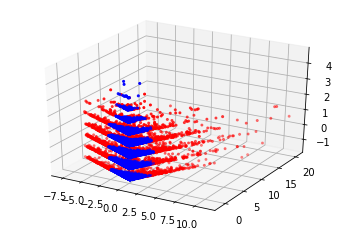

In [20]:
# https://scikit-learn.org/stable/modules/outlier_detection.html
# https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=10, warm_start=True)
prediction = clf.fit(anomaly_df.dropna()).predict(anomaly_df.dropna())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduce[prediction > 0, 0], X_reduce[prediction > 0, 1], zs=X_reduce[prediction > 0, 2], s=4, lw=1, label="inliers",c="b")
ax.scatter(X_reduce[prediction < 0, 0], X_reduce[prediction < 0, 1], zs=X_reduce[prediction < 0, 2], s=4, lw=1, label="outliers",c="r")

plt.show()

In [24]:
print(sum(prediction > 0))
print(sum(prediction < 0))

21774
2858
